In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2000-01-01 00:00:00
2024-07-01 00:00:00


In [66]:
import glob
folder_path = "Additional Data/*.csv"

data_df = pd.read_csv('VehicleData-1.csv')
data_df['DATE'] = pd.to_datetime(data_df['DATE'], format='%m/%d/%y')
min_date = min(data_df['DATE'])
max_date = max(data_df['DATE'])



for file_path in glob.glob(folder_path):
    temp = pd.read_csv(file_path)
    temp['DATE'] = pd.to_datetime(temp['observation_date'])

    # Assume the second column is the value
    value_col = temp.columns[1]
    temp = temp.drop(columns= ['observation_date'])

    data_df = pd.merge(data_df, temp, on='DATE', how='inner')
    
# Set date as index
data_df = data_df.set_index('DATE').sort_index()

if 'TERMCBAUTO48NS' in data_df.columns:
    data_df['TERMCBAUTO48NS'] = data_df['TERMCBAUTO48NS'].ffill()
    data_df['TERMCBAUTO48NS'] = data_df['TERMCBAUTO48NS'].bfill()

display(data_df.head())
display(data_df.tail())
cov_matrix = data_df.cov()
corr_matrix = data_df.corr()

,Total Sales,New Orders,AISRSA,DAUPSA,DAUTOSAAR,FEDFUNDS,FAUTOSA,AMVPNO,GASREGCOVM,NATURALGASD11,TRANSIT,TERMCBAUTO48NS,VMT
DATE,,,,,,,,,,,,,
2000-01-01,18.635,43668,2.257,469.3,7.285,5.45,168.5,43668,1.279,1811.5,724934,8.88,203442
2000-02-01,19.401,39808,2.089,461.2,7.504,5.73,171.9,39808,1.371,1841.2,756536,8.88,199261
2000-03-01,18.343,40749,2.237,462.3,7.003,5.85,164.0,40749,1.498,1721.0,843730,8.88,232490
2000-04-01,17.939,40644,2.307,475.4,6.874,6.02,169.1,40644,1.437,1841.3,757458,8.88,227698
2000-05-01,17.943,38730,2.319,481.2,6.844,6.27,169.4,38730,1.456,1971.1,818246,9.22,242501


,Total Sales,New Orders,AISRSA,DAUPSA,DAUTOSAAR,FEDFUNDS,FAUTOSA,AMVPNO,GASREGCOVM,NATURALGASD11,TRANSIT,TERMCBAUTO48NS,VMT
DATE,,,,,,,,,,,,,
2024-03-01,15.929,63531,1.389,134.3,2.053,5.33,77.482,65982,3.318,2700.3,648174,8.57,274585
2024-04-01,16.345,64455,1.356,113.1,2.112,5.33,76.516,67028,3.466,2748.1,660431,8.57,273208
2024-05-01,16.480,64445,1.407,120.5,2.088,5.33,73.335,66836,3.459,2787.0,683443,8.65,292503
2024-06-01,15.629,63995,1.472,122.3,1.974,5.33,70.642,66095,3.326,2797.8,625612,8.65,283075
2024-07-01,16.348,62339,1.412,111.4,2.046,5.33,77.776,64642,3.378,2827.5,627131,8.65,291078


In [67]:
cov_matrix = data_df.cov()
corr_matrix = data_df.corr()

Additional Data

In [152]:
target1 = data_df.columns[0]   # first series
target2 = data_df.columns[1]   # second series

insights = []

for col in data_df.columns:    
    # correlation values
    corr_with_1 = corr_matrix.loc[target1, col]
    corr_with_2 = corr_matrix.loc[target2, col]
    
    # variance contribution
    cov_with_1 = cov_matrix.loc[target1, col]
    cov_with_2 = cov_matrix.loc[target2, col]
    
    # Interpret strength and direction
    def interpret(corr):
        if abs(corr) < 0.2:
            return "negligible"
        elif abs(corr) < 0.5:
            return "moderate"
        else:
            return "strong"
    
    insights.append({
        "variable": col,
        f"effect_on_{target1}": f"{interpret(corr_with_1)} {'positive' if corr_with_1>0 else 'negative'} relationship (corr={corr_with_1:.2f})",
        f"effect_on_{target2}": f"{interpret(corr_with_2)} {'positive' if corr_with_2>0 else 'negative'} relationship (corr={corr_with_2:.2f})",
        f"cov_with_{target1}": cov_with_1,
        f"corr_with_{target1}": f'{corr_with_1:.2f}',
        f"cov_with_{target2}": cov_with_2,
        f"corr_with_{target2}": f'{corr_with_2:.2f}',
        
    })

insights_df = pd.DataFrame(insights)
insights_df['corr_with_Total Sales'] = insights_df['corr_with_Total Sales'].astype(float)
insights_df['corr_with_New Orders'] = insights_df["corr_with_New Orders"].astype(float)

total_sales_insights = insights_df[['variable']+ [col for col in insights_df.columns if col.endswith("Total Sales")]].sort_values(by = 'corr_with_Total Sales', ascending = False).reset_index(drop=True)
new_orders_insights = insights_df[['variable']+ [col for col in insights_df.columns if col.endswith("New Orders")]].sort_values(by = 'corr_with_New Orders', ascending = False).reset_index(drop=True)

total_sales_insights= total_sales_insights[(abs(total_sales_insights['corr_with_Total Sales']) >=0.3) & (abs(total_sales_insights['corr_with_Total Sales']) <1)].reset_index(drop=True)
new_orders_insights= new_orders_insights[(abs(new_orders_insights['corr_with_New Orders']) >=0.3) & (abs(new_orders_insights['corr_with_New Orders']) <1.00) ].reset_index(drop=True)


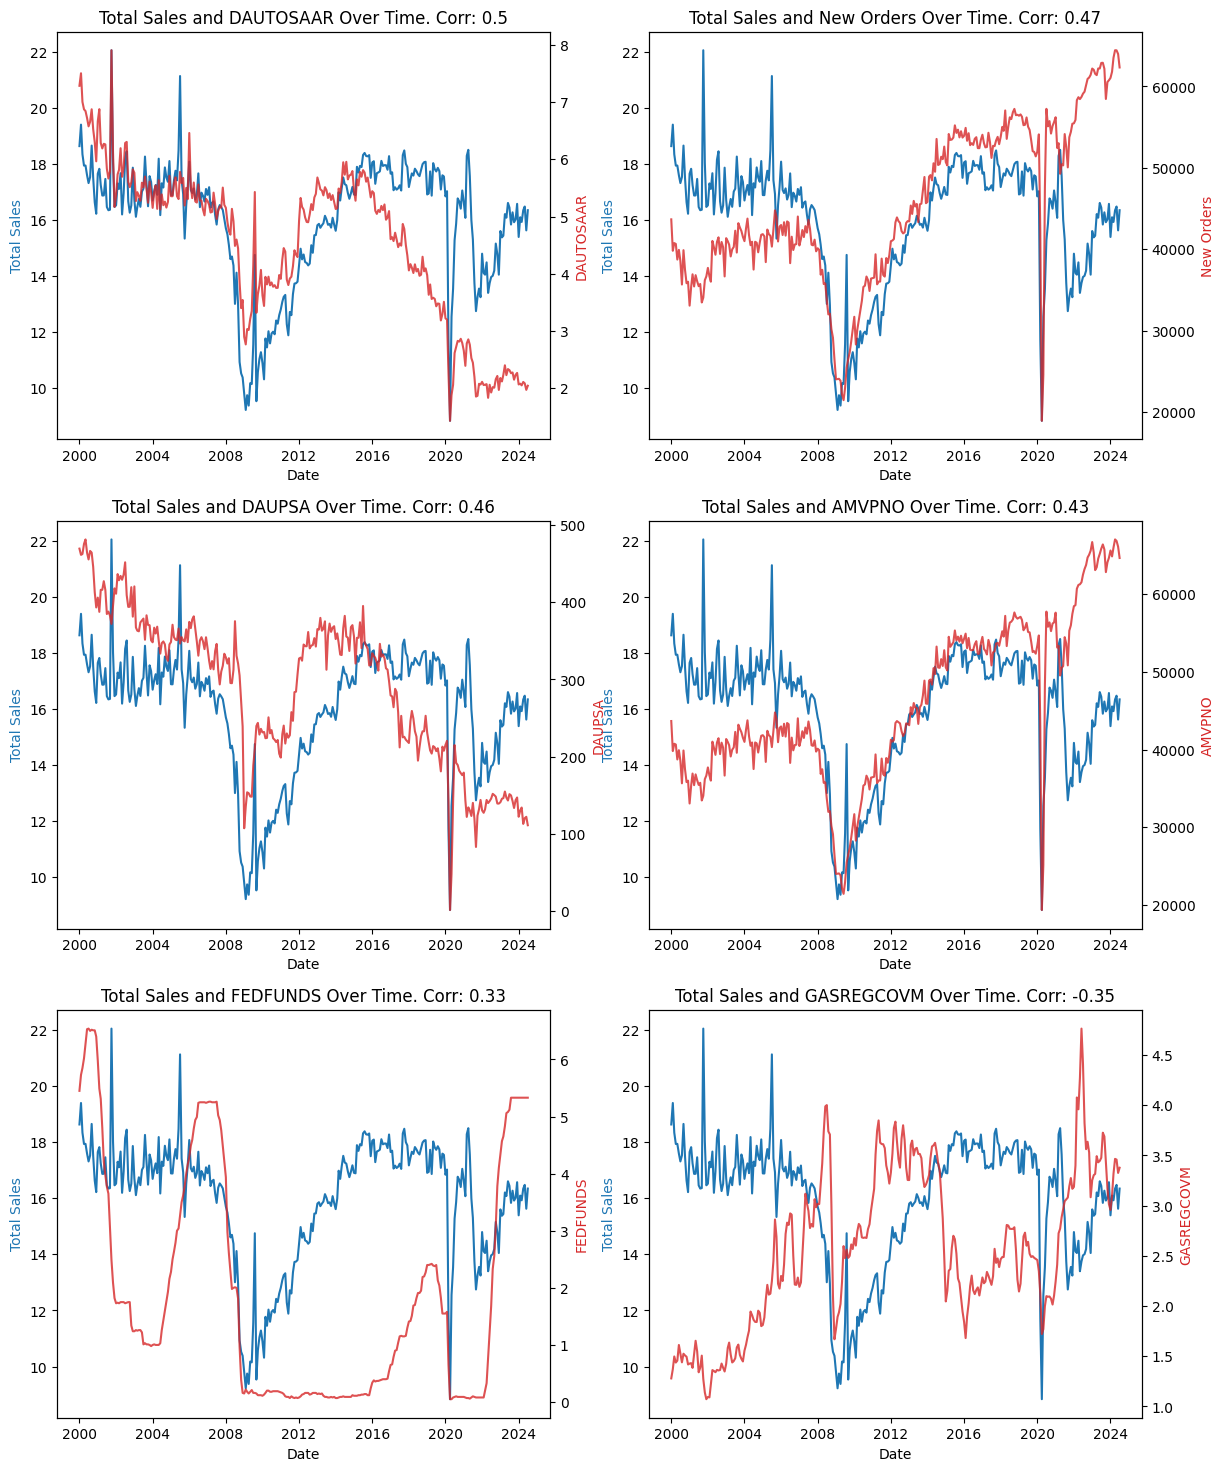

In [153]:
from math import ceil, floor
plot_rows = ceil((len(total_sales_insights)) / 2)
fig, axes = plt.subplots(nrows=plot_rows, ncols=2, figsize=(14, 6*plot_rows))
for index, row in total_sales_insights.iterrows():
    plot_row = floor(index / 2)    
    plot_col = index % 2

    variable =  row['variable']
    corr = row['corr_with_Total Sales']
    ax1 = axes[(plot_row,plot_col)]
    # Left Y-axis (Total Sales)
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total Sales', color=color)
    ax1.plot(data_df.index, data_df['Total Sales'], color=color, label='Total Sales')
    # Right Y-axis (variable)
    ax1 = ax1.twinx()
    color = 'tab:red'
    ax1.set_ylabel(variable, color=color)
    ax1.plot(data_df.index, data_df[variable], color=color, alpha=0.8, label=variable)
    ax1.set_title(f'Total Sales and {variable} Over Time. Corr: {corr}')

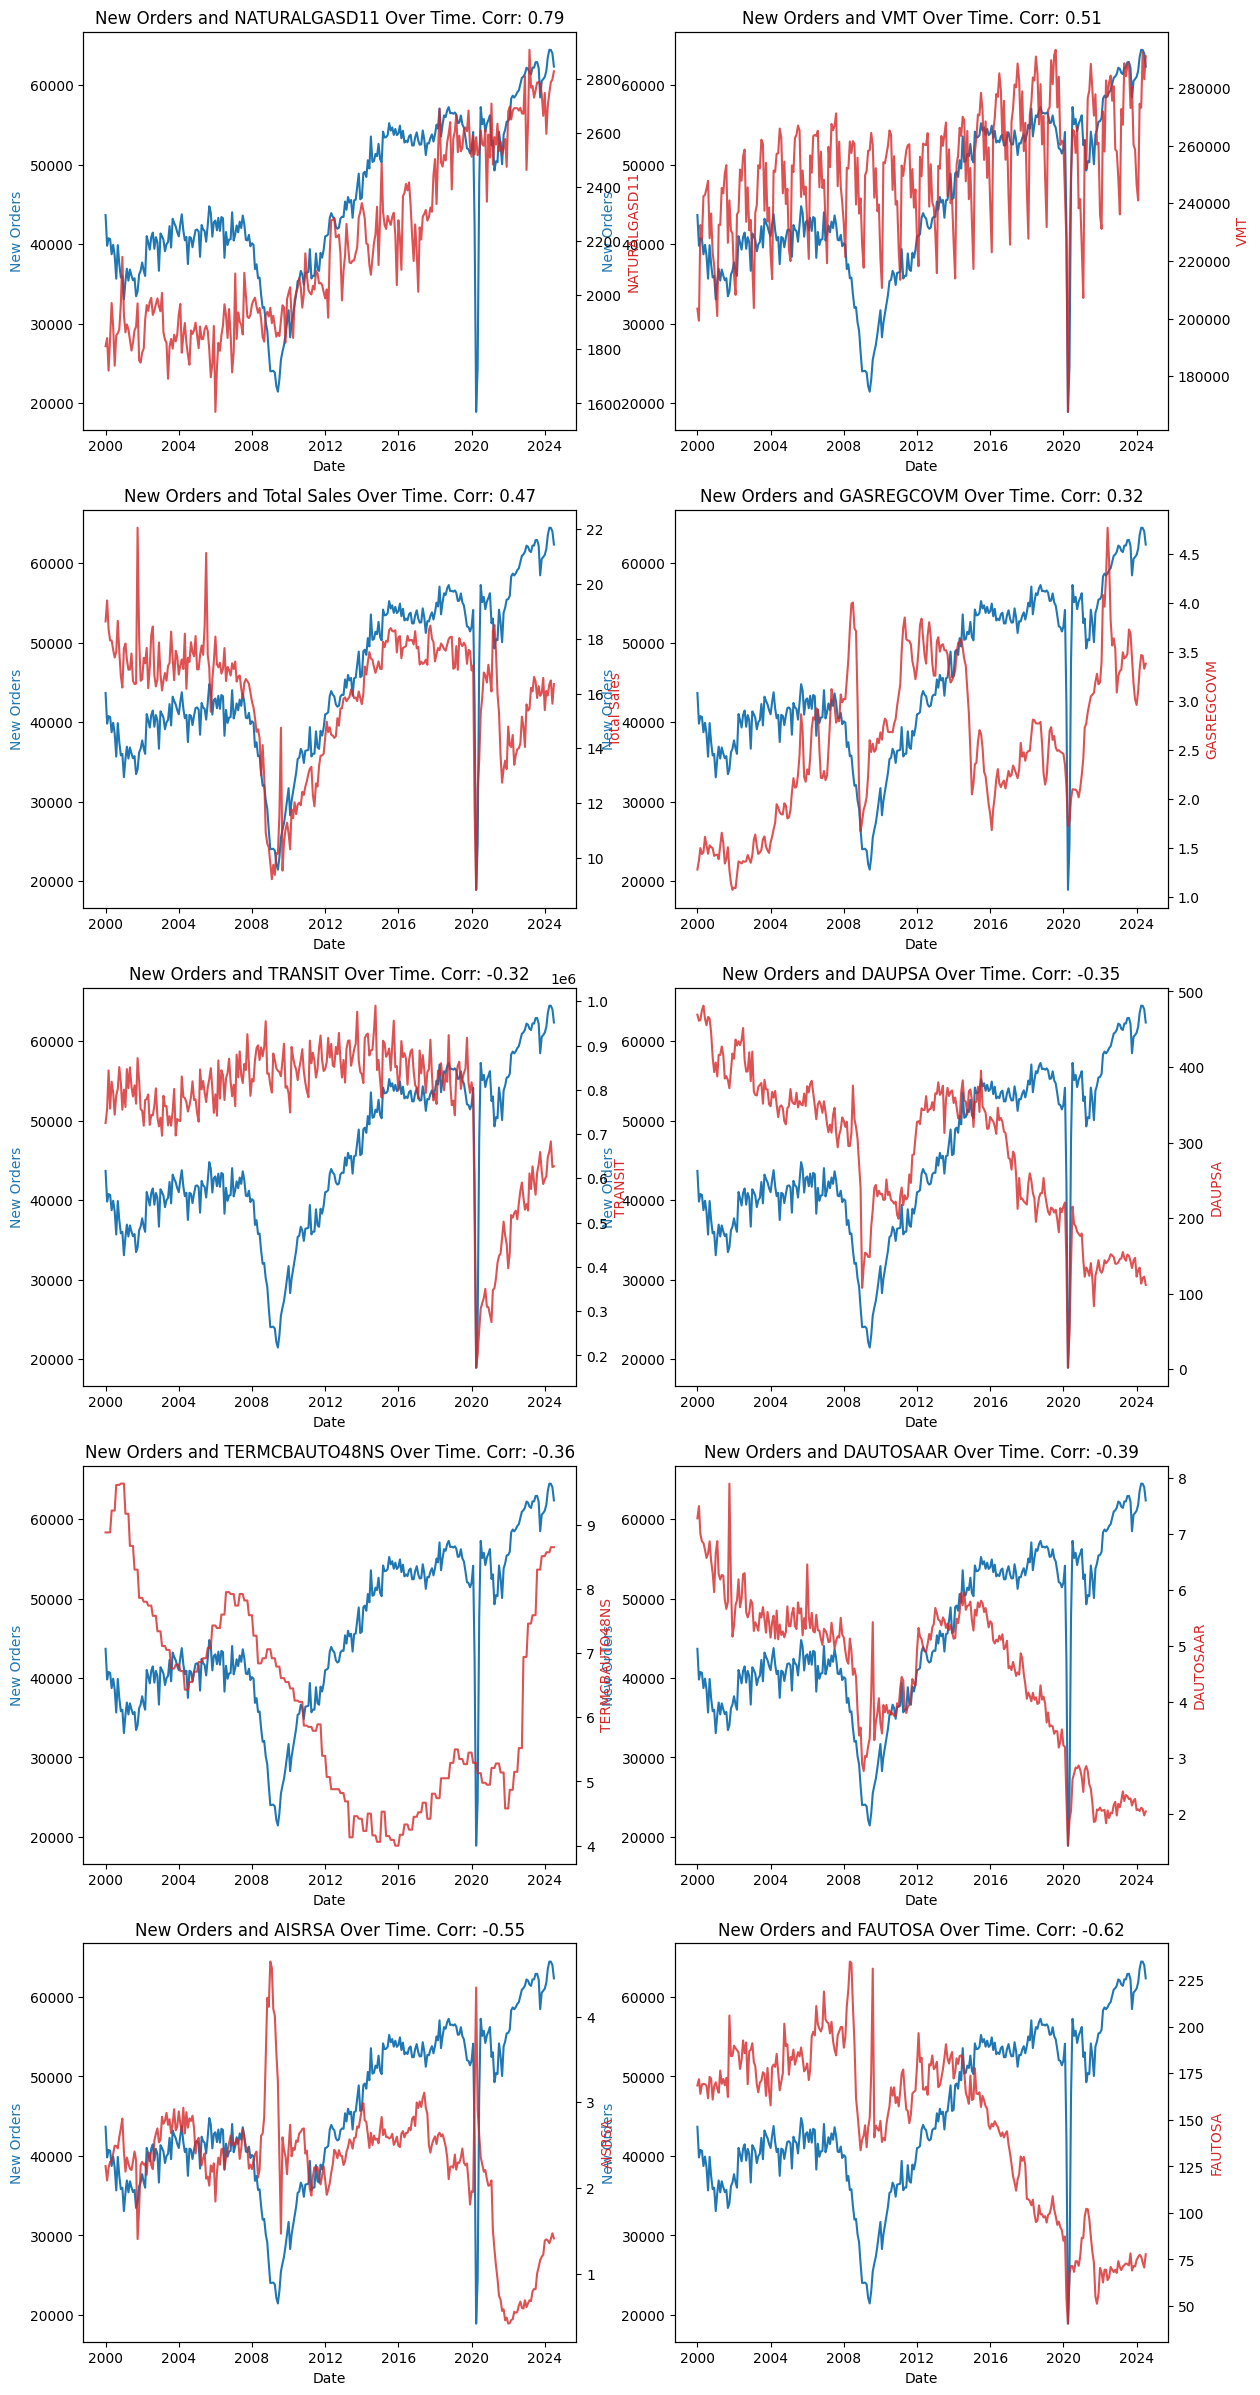

In [158]:

plot_rows = ceil((len(new_orders_insights)) / 2)
fig, axes = plt.subplots(nrows=plot_rows, ncols=2, figsize=(14, 6*plot_rows))
for index, row in new_orders_insights.iterrows():
    plot_row = floor(index / 2)    
    plot_col = index % 2

    variable =  row['variable']
    corr = row['corr_with_New Orders']
    ax1 = axes[(plot_row,plot_col)]
    # Left Y-axis (Total Sales)
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('New Orders', color=color)
    ax1.plot(data_df.index, data_df['New Orders'], color=color, label='New Orders')
    # Right Y-axis (variable)
    ax1 = ax1.twinx()
    color = 'tab:red'
    ax1.set_ylabel(variable, color=color)
    ax1.plot(data_df.index, data_df[variable], color=color, alpha=0.8, label=variable)
    ax1.set_title(f'New Orders and {variable} Over Time. Corr: {corr}')

In [164]:
diff_df = data_df.diff().dropna()
diff_cov_matrix = diff_df.cov()
diff_corr_matrix = diff_df.corr()
target1 = diff_df.columns[0]   # first series
target2 = diff_df.columns[1]   # second series

diff_insights = []

for col in diff_df.columns:    
    # correlation values
    corr_with_1 = diff_corr_matrix.loc[target1, col]
    corr_with_2 = diff_corr_matrix.loc[target2, col]
    
    # variance contribution
    cov_with_1 = diff_cov_matrix.loc[target1, col]
    cov_with_2 = diff_cov_matrix.loc[target2, col]
    
    # Interpret strength and direction
    def interpret(corr):
        if abs(corr) < 0.2:
            return "negligible"
        elif abs(corr) < 0.5:
            return "moderate"
        else:
            return "strong"
    
    diff_insights.append({
        "variable": col,
        f"effect_on_{target1}": f"{interpret(corr_with_1)} {'positive' if corr_with_1>0 else 'negative'} relationship (corr={corr_with_1:.2f})",
        f"effect_on_{target2}": f"{interpret(corr_with_2)} {'positive' if corr_with_2>0 else 'negative'} relationship (corr={corr_with_2:.2f})",
        f"cov_with_{target1}": cov_with_1,
        f"corr_with_{target1}": f'{corr_with_1:.2f}',
        f"cov_with_{target2}": cov_with_2,
        f"corr_with_{target2}": f'{corr_with_2:.2f}',
        
    })

diff_insights_df = pd.DataFrame(diff_insights)
diff_insights_df['corr_with_Total Sales'] = diff_insights_df['corr_with_Total Sales'].astype(float)
diff_insights_df['corr_with_New Orders'] = diff_insights_df["corr_with_New Orders"].astype(float)

diff_total_sales_insights = diff_insights_df[['variable']+ [col for col in diff_insights_df.columns if col.endswith("Total Sales")]].sort_values(by = 'corr_with_Total Sales', ascending = False).reset_index(drop=True)
diff_new_orders_insights = diff_insights_df[['variable']+ [col for col in diff_insights_df.columns if col.endswith("New Orders")]].sort_values(by = 'corr_with_New Orders', ascending = False).reset_index(drop=True)

diff_total_sales_insights= diff_total_sales_insights[(abs(diff_total_sales_insights['corr_with_Total Sales']) >=0.2) & (abs(diff_total_sales_insights['corr_with_Total Sales']) <1)].reset_index(drop=True)
diff_new_orders_insights= diff_new_orders_insights[(abs(diff_new_orders_insights['corr_with_New Orders']) >=0.2) & (abs(diff_new_orders_insights['corr_with_New Orders']) <1.00) ].reset_index(drop=True)


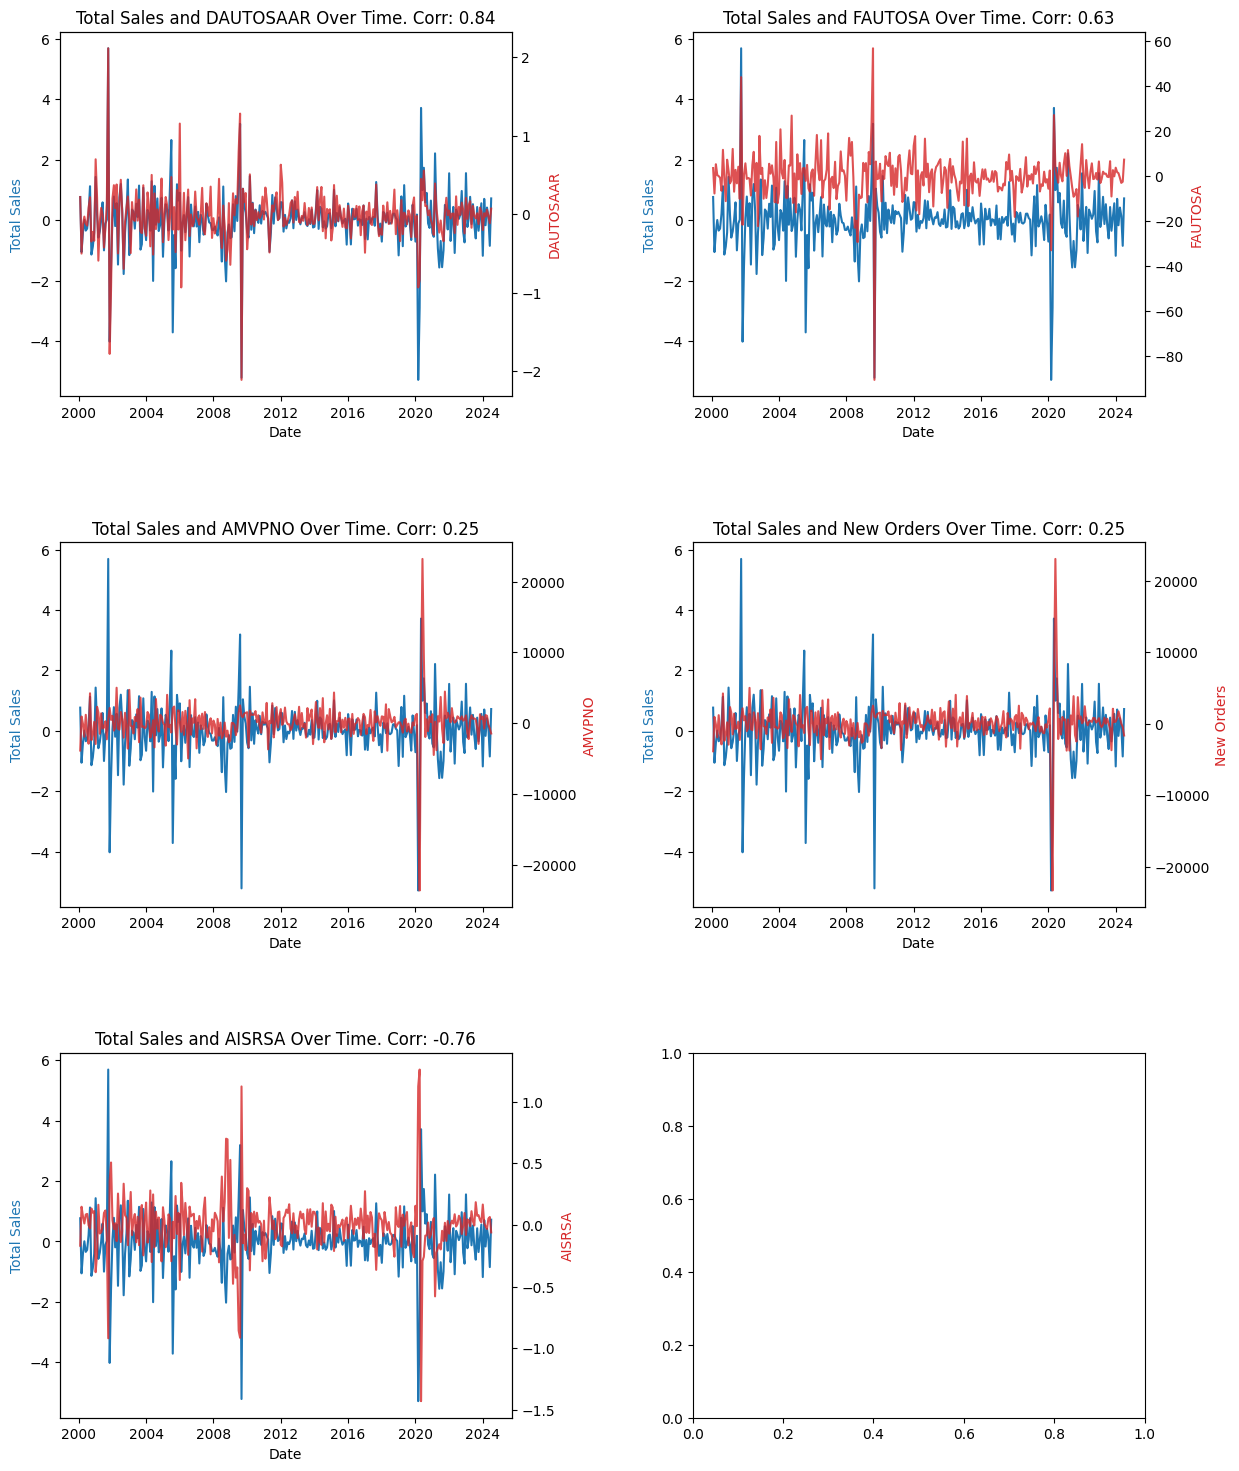

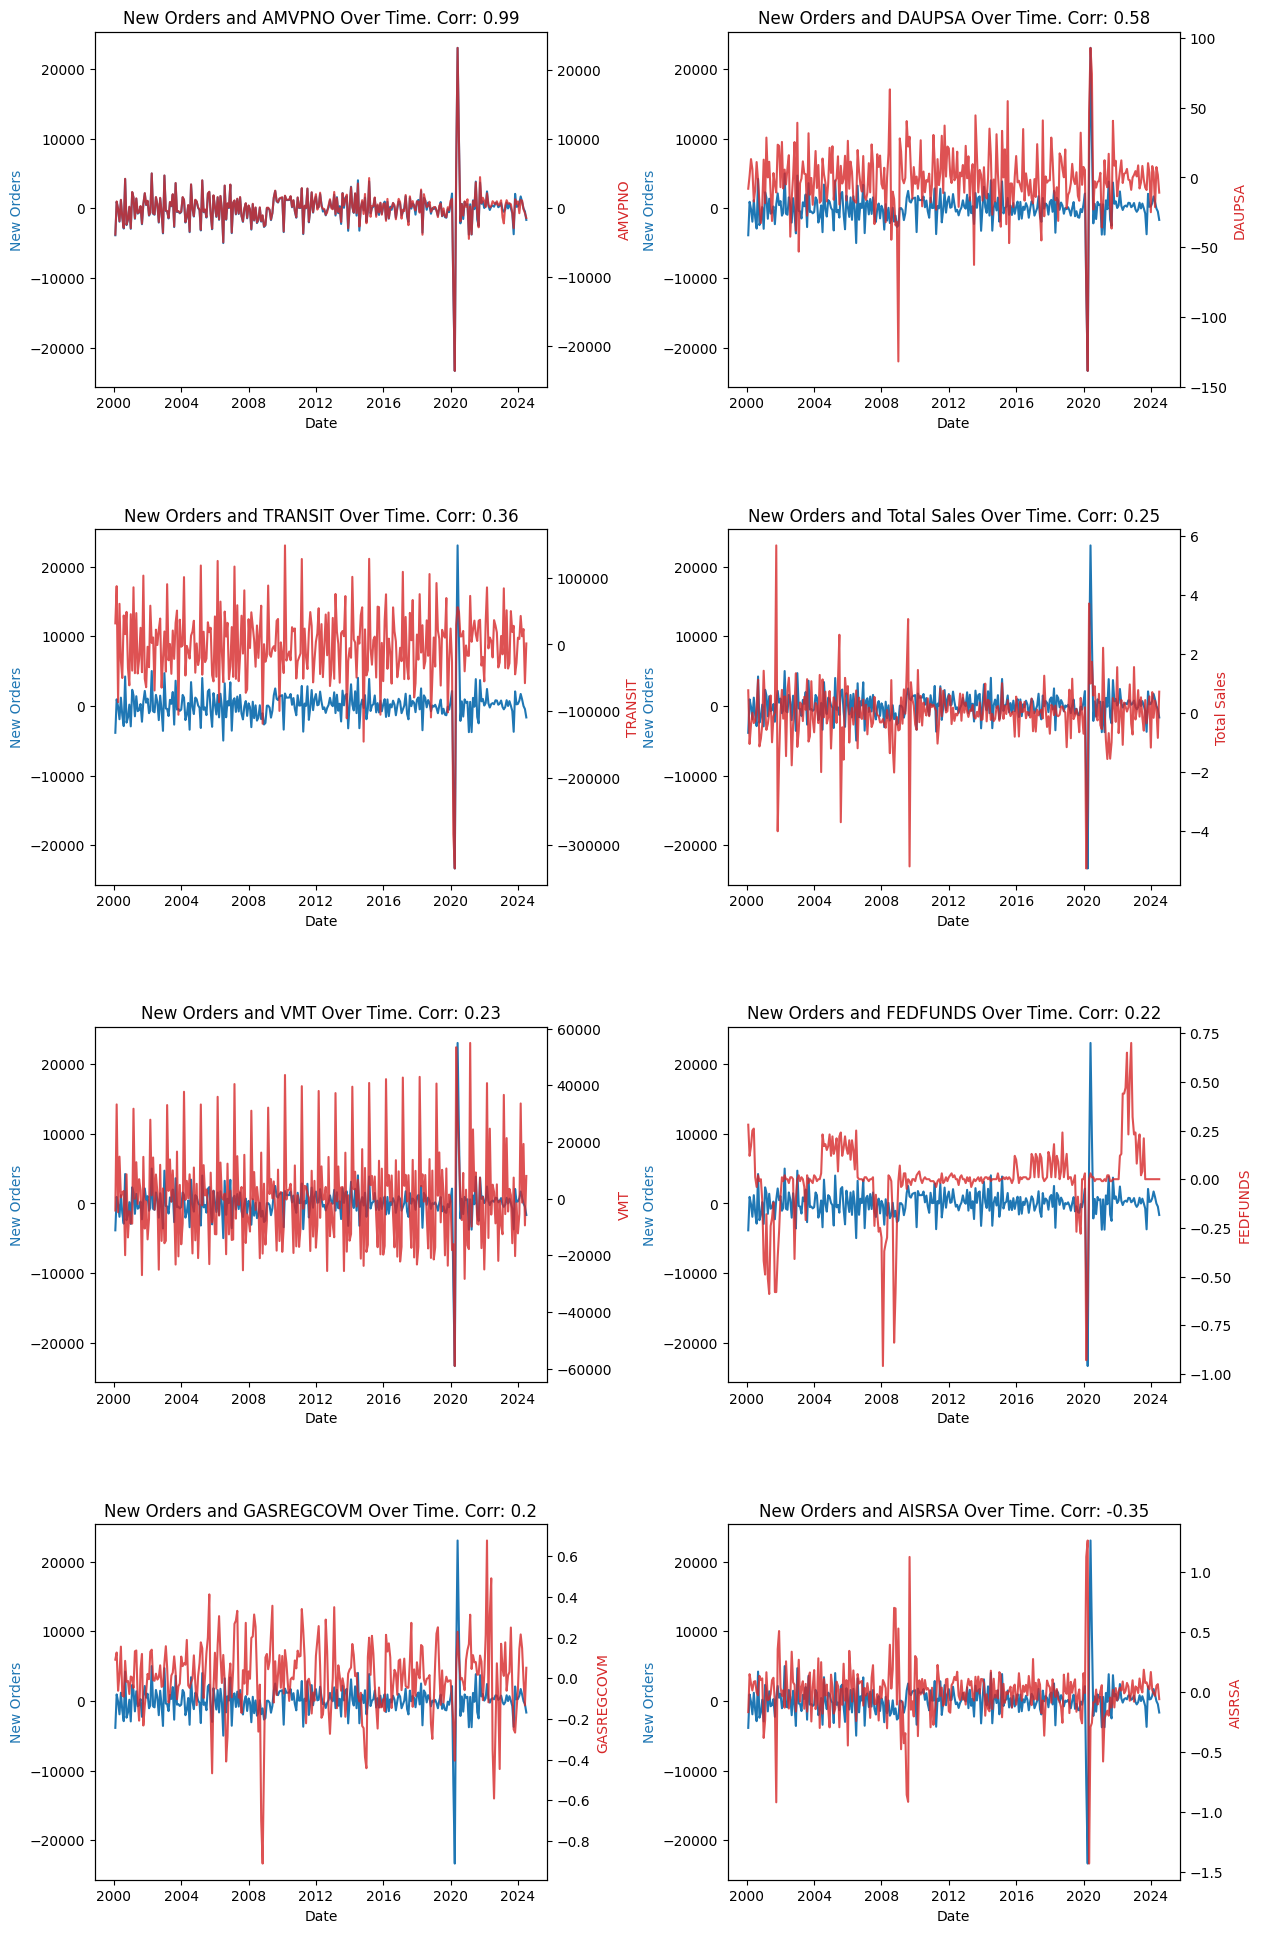

In [165]:
from math import ceil, floor
plot_rows = ceil((len(diff_total_sales_insights)) / 2)
fig, axes = plt.subplots(nrows=plot_rows, ncols=2, figsize=(14, 6*plot_rows))
plt.subplots_adjust(wspace=0.4, hspace=0.4) # Increase horizontal and vertical spacing

for index, row in diff_total_sales_insights.iterrows():
    plot_row = floor(index / 2)    
    plot_col = index % 2

    variable =  row['variable']
    corr = row['corr_with_Total Sales']
    ax1 = axes[(plot_row,plot_col)]
    # Left Y-axis (Total Sales)
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total Sales', color=color)
    ax1.plot(diff_df.index, diff_df['Total Sales'], color=color, label='Total Sales')
    # Right Y-axis (variable)
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel(variable, color=color)
    ax2.plot(diff_df.index, diff_df[variable], color=color, alpha=0.8, label=variable)
    ax2.set_title(f'Total Sales and {variable} Over Time. Corr: {corr}')

plt.show()    
plot_rows = ceil((len(diff_new_orders_insights)) / 2)
fig, axes = plt.subplots(nrows=plot_rows, ncols=2, figsize=(14, 6*plot_rows))
plt.subplots_adjust(wspace=0.4, hspace=0.4) # Increase horizontal and vertical spacing

for index, row in diff_new_orders_insights.iterrows():
    plot_row = floor(index / 2)    
    plot_col = index % 2

    variable =  row['variable']
    corr = row['corr_with_New Orders']
    ax1 = axes[(plot_row,plot_col)]
    # Left Y-axis (Total Sales)
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('New Orders', color=color)
    ax1.plot(diff_df.index, diff_df['New Orders'], color=color, label='New Orders')
    # Right Y-axis (variable)
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel(variable, color=color)
    ax2.plot(diff_df.index, diff_df[variable], color=color, alpha=0.8, label=variable)
    ax2.set_title(f'New Orders and {variable} Over Time. Corr: {corr}')

plt.show()

In [170]:
sales_vars = diff_total_sales_insights['variable'].tolist()
order_vars=  diff_new_orders_insights['variable'].tolist()
sales_vars

['DAUTOSAAR', 'FAUTOSA', 'AMVPNO', 'New Orders', 'AISRSA']

In [187]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

grainger_results = []  # list to collect all results
for var in sales_vars:
    print(var)
    grainger_data = diff_df[['Total Sales', variable]].dropna()
    max_lag = 5


    test_result = grangercausalitytests(grainger_data, maxlag=lag)
    p_value = test_result[lag][0]['ssr_ftest'][1]   # extract the F-test p-value
    f_stat = test_result[lag][0]['ssr_ftest'][0]    # extract the F-statistic

    grainger_results.append({
            'response': 'Total Sales',
            'variable': variable,
            'lag': lag,
            'F-stat': f_stat,
            'p-value': p_value
        })

for var in order_vars:
    print(var)
    grainger_data = diff_df[['New Orders', variable]].dropna()
    max_lag = 5


    test_result = grangercausalitytests(grainger_data, maxlag=lag)
    p_value = test_result[lag][0]['ssr_ftest'][1]   # extract the F-test p-value
    f_stat = test_result[lag][0]['ssr_ftest'][0]    # extract the F-statistic

    grainger_results.append({
            'response': 'New Orders',
            'variable': variable,
            'lag': lag,
            'F-stat': f_stat,
            'p-value': p_value
        })


DAUTOSAAR

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3153  , p=0.1292  , df_denom=290, df_num=1
ssr based chi2 test:   chi2=2.3393  , p=0.1261  , df=1
likelihood ratio test: chi2=2.3300  , p=0.1269  , df=1
parameter F test:         F=2.3153  , p=0.1292  , df_denom=290, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8885  , p=0.4124  , df_denom=287, df_num=2
ssr based chi2 test:   chi2=1.8079  , p=0.4050  , df=2
likelihood ratio test: chi2=1.8023  , p=0.4061  , df=2
parameter F test:         F=0.8885  , p=0.4124  , df_denom=287, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5813  , p=0.6277  , df_denom=284, df_num=3
ssr based chi2 test:   chi2=1.7869  , p=0.6178  , df=3
likelihood ratio test: chi2=1.7814  , p=0.6190  , df=3
parameter F test:         F=0.5813  , p=0.6277  , df_denom=284, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8096  , 

Grainger Results

In [183]:
# Convert to DataFrame
granger_results_df = pd.DataFrame(grainger_results)

granger_results_df = granger_results_df.drop_duplicates()
# Sort by smallest p-value (most significant lag)
granger_results_df = granger_results_df.sort_values('p-value', ascending= False)

#filter out p values above 0.05
#granger_results_df = granger_results_df[granger_results_df['p-value'] >=0.05]

display(granger_results_df)

,response,variable,lag,F-stat,p-value
4,Total Sales,AISRSA,5,0.584699,7.117205e-01
2,Total Sales,AISRSA,3,0.581301,6.277195e-01
3,Total Sales,AISRSA,4,0.809577,5.199038e-01
1,Total Sales,AISRSA,2,0.888456,4.124183e-01
0,Total Sales,AISRSA,1,2.315330,1.291937e-01
29,New Orders,AISRSA,5,7.140605,2.647404e-06
28,New Orders,AISRSA,4,8.882474,9.110099e-07
27,New Orders,AISRSA,3,11.390953,4.471005e-07
26,New Orders,AISRSA,2,17.656596,5.863373e-08
25,New Orders,AISRSA,1,43.573193,1.940678e-10


In [189]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np

# Load example data
data = sm.datasets.macrodata.load_pandas().data[['realgdp', 'realcons']].pct_change().dropna()

# Perform Granger causality tests up to 4 lags
gc_res = grangercausalitytests(data, maxlag=4, verbose= False)
print(gc_res)

{np.int64(1): ({'ssr_ftest': (np.float64(28.72480341484925), np.float64(2.3081455830241758e-07), np.float64(198.0), np.int64(1)), 'ssr_chi2test': (np.float64(29.160027709013633), np.float64(6.663994390982135e-08), np.int64(1)), 'lrtest': (np.float64(27.229456246460586), np.float64(1.8068480152069365e-07), np.int64(1)), 'params_ftest': (np.float64(28.72480341484923), np.float64(2.3081455830242092e-07), np.float64(198.0), 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000015DD35123D0>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000015DD25CCBD0>, array([[0., 1., 0.]])]), np.int64(2): ({'ssr_ftest': (np.float64(18.98804608410747), np.float64(2.9209045472774995e-08), np.float64(195.0), np.int64(2)), 'ssr_chi2test': (np.float64(38.949838121246096), np.float64(3.4845774070303933e-09), np.int64(2)), 'lrtest': (np.float64(35.587256203442394), np.float64(1.8720847364547857e-08), np.int64(2)), 'params_ftest': (np.float64(18.98804

C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
